In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# plot title 한글 패치
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
df_freq_age = pd.read_csv('./연령별 지역화폐 사용 빈도 현황.csv', encoding='cp949', parse_dates=["년월"])

In [3]:
df_freq_age.shape

(2274, 6)

In [4]:
df_freq_age.head()

,년월,시도명,시군구명,연령대코드,결제상품명,사용빈도
0,2019-03-01,경기도,양주시,40,양주사랑카드,3
1,2019-04-01,경기도,가평군,20,가평사랑상품권,3
2,2019-04-01,경기도,가평군,30,가평사랑상품권,37
3,2019-04-01,경기도,가평군,40,오산화폐 오색전,1
4,2019-04-01,경기도,가평군,40,가평사랑상품권,23


In [5]:
df_freq_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2274 entries, 0 to 2273
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   년월      2274 non-null   datetime64[ns]
 1   시도명     2274 non-null   object        
 2   시군구명    2274 non-null   object        
 3   연령대코드   2274 non-null   object        
 4   결제상품명   2274 non-null   object        
 5   사용빈도    2274 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 106.7+ KB


In [6]:
pd.set_option('float_format', '{:.2f}'.format)
df_freq_age.describe()

,사용빈도
count,2274.00
mean,1182.54
std,3482.97
min,1.00
25%,2.00
50%,38.00
75%,753.25
max,53397.00


In [38]:
# 결측치 확인
df_freq_age.isnull().sum()

년월            0
시도명           0
시군구명          0
연령대코드         0
결제상품명         0
사용빈도          0
year          0
month         0
year_month    0
행정구역          0
dtype: int64

In [7]:
df_freq_age['시군구명'].unique()

array(['양주시', '가평군', '고양시 덕양구', '고양시 일산동구', '고양시 일산서구', '과천시', '광명시',
       '광주시', '구리시', '군포시', '남양주시', '동두천시', '부천시', '성남시 분당구', '성남시 수정구',
       '성남시 중원구', '수원시 권선구', '수원시 영통구', '수원시 장안구', '수원시 팔달구', '시흥시',
       '안산시 단원구', '안산시 상록구', '안성시', '안양시 동안구', '양평군', '여주시', '오산시',
       '용인시 기흥구', '용인시 수지구', '용인시 처인구', '의왕시', '의정부시', '이천시', '파주시',
       '평택시', '포천시', '하남시', '화성시', '연천군', '안양시 만안구', '김포시'], dtype=object)

In [8]:
#경기 행정구역 - 시 : 28 / 군 : 3 (31) 
s_split1 = df_freq_age['시군구명'].str.split(" ", expand=True)
len(s_split1[0].unique())

31

In [9]:
df_freq_age["year"] = df_freq_age["년월"].dt.year
df_freq_age["month"] = df_freq_age["년월"].dt.month
df_freq_age['year_month'] = df_freq_age["년월"].dt.strftime("%Y-%m")
df_freq_age['행정구역'] = s_split1[0]

In [10]:
df_freq_age.tail()

,년월,시도명,시군구명,연령대코드,결제상품명,사용빈도,year,month,year_month,행정구역
2269,2019-09-01,경기도,화성시,50,행복화성지역화폐,7051,2019,9,2019-09,화성시
2270,2019-09-01,경기도,화성시,60,행복화성지역화폐,1323,2019,9,2019-09,화성시
2271,2019-09-01,경기도,화성시,60,행복화성지역화폐_화이트,1,2019,9,2019-09,화성시
2272,2019-09-01,경기도,화성시,70,행복화성지역화폐,157,2019,9,2019-09,화성시
2273,2019-09-01,경기도,화성시,80,행복화성지역화폐,38,2019,9,2019-09,화성시


<AxesSubplot:xlabel='연령대코드', ylabel='사용빈도'>

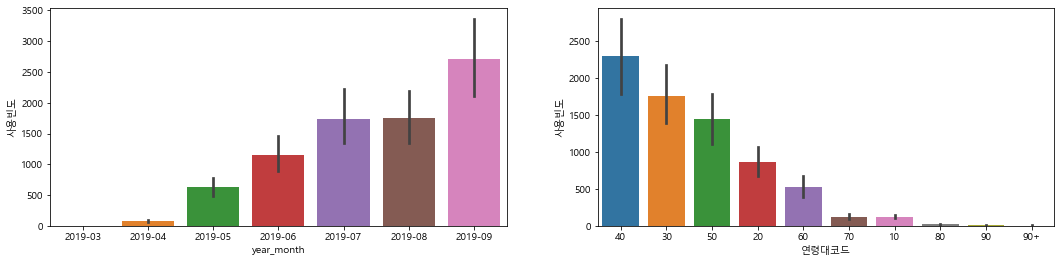

In [33]:
figure, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)

figure.set_size_inches(18, 4)

sns.barplot(data=df_freq_age, x='year_month', y='사용빈도' ,ax=ax1)
sns.barplot(data=df_freq_age, x='연령대코드', y='사용빈도' ,ax=ax2, order = df_freq_age['연령대코드'].value_counts().index)

In [36]:
month_s = df_freq_age.groupby('month')
month_s['사용빈도'].sum().sort_values(ascending=False)

month
9    908941
7    590286
8    558393
6    384606
5    196368
4     50490
3         3
Name: 사용빈도, dtype: int64

In [39]:
df_freq_age.to_csv('경기도_연령별_사용빈도.csv', index = False)